<a href="https://colab.research.google.com/github/AngelGui/MachineLearning/blob/main/KNN_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.datasets import load_iris

data = load_iris()
# data

In [77]:
train, target, feature_names = data['data'], data['target'],data['feature_names']

In [78]:
train = pd.DataFrame(train, columns=feature_names)
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train, target)

KNeighborsClassifier(n_neighbors=3)

In [80]:
y_predict = knn.predict(train)

In [81]:
accuracy = (y_predict == target).sum()/len(target)
accuracy

0.96

In [82]:
random_index = np.random.permutation(train.index)
random_index

array([  8, 145,  17, 100,  61, 102,  29, 111,  62,  69, 127,  97,  60,
       133,  12,  79,  36,  67,   5,  19,  88,  37, 126,   1,  13,   6,
        23,  48, 142, 119,  51,  64,  99, 123,  28,  38,  65,  15,  78,
        49,  43, 146, 124,  21,  25,  94, 132, 134,  22,  20,   0, 101,
       103, 107,  24, 138,  84,  76, 110,  16, 113,  73,  46, 137,  86,
         9, 112,  74,  18,  32,  54,  40, 106,  85,  63, 128, 147,  95,
       144,  66,  10,  53, 117,  47, 129,  11, 122,  77, 125, 116,  56,
        31,  80, 141,  39,  98,  96, 118,  34, 121,  91,  75,  92, 136,
        87,  57,  44, 104,  41, 108,  71,   2,   3, 120,  33, 115,  26,
        52,  30, 105,  90,  35,  45,  72, 135, 139, 149,  27,  50, 140,
        55,  82,   7,  68,  42,  58,  14,  93, 130, 143, 148, 131,  59,
       109, 114,  70,  81,  83,   4,  89])

In [83]:
size = int(len(target) * 0.8)
size

120

In [84]:
X_train = train.iloc[random_index][:size] #dataframe的索引使用iloc，iloc和loc后面都是跟[]，而不是()，因为它相当于是一种切片的功能
X_test = train.iloc[random_index][size:]
# print(X_train)
# print(X_test)
y_train = target[random_index][:size] #numpy的数组索引
y_train
y_test = target[random_index][size:] #numpy的数组索引
y_test

array([1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 0, 1])

In [85]:
def train_test_split(train, target, test_size, count, knn):
  size = int(len(target) * (1-test_size))
  train_scores = []
  test_scores = []
  for i in range(count):
    np.random.seed(i)
    random_index = np.random.permutation(train.index)
    X_train = train.iloc[random_index][:size]
    X_test = train.iloc[random_index][size:]
    y_train = target[random_index][:size]
    y_test = target[random_index][size:]
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    test_scores.append(score)
    score1 = knn.score(X_train, y_train)
    train_scores.append(score1)
  # print(test_scores)
  # print(train_scores)
  return sum(train_scores)/len(train_scores),sum(test_scores)/len(test_scores)

# print(train_test_split(train, target, 0.2, 20))

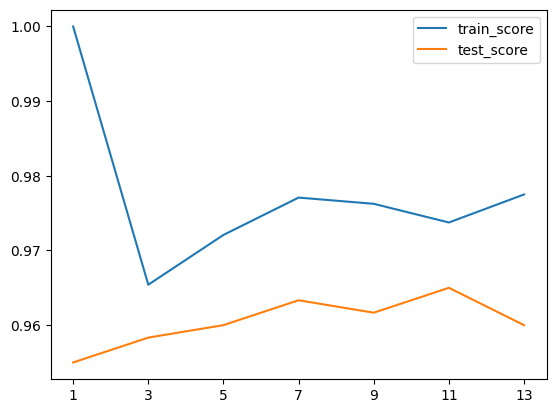

In [86]:
# adjust k parameters
k_list = [1,3,5,7,9,11,13]
train_scores_k = []
test_scores_k = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  a, b = train_test_split(train, target, 0.2, 20, knn)
  train_scores_k.append(a)
  test_scores_k.append(b)
plt.plot(k_list, train_scores_k, label='train_score')
plt.plot(k_list, test_scores_k, label='test_score')
plt.xticks(k_list)
plt.legend()